# OpenAI Gym

The Gym library is a collection of environments that we can use with the reinforcement learning algorithms we develop.Gym has a ton of environments ranging from simple text based games to Atari games like Breakout and Space Invaders.

We'll be making use of Gym to provide us with an environment for a simple game called Frozen Lake. We'll then train an agent to play the game using Q-learning, and we'll get a playback of how the agent does after being trained.

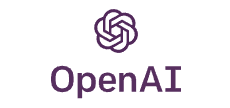




In [15]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

# Environment - FrozenLake

https://www.gymlibrary.ml/environments/toy_text/frozen_lake/?highlight=frozen+lake 



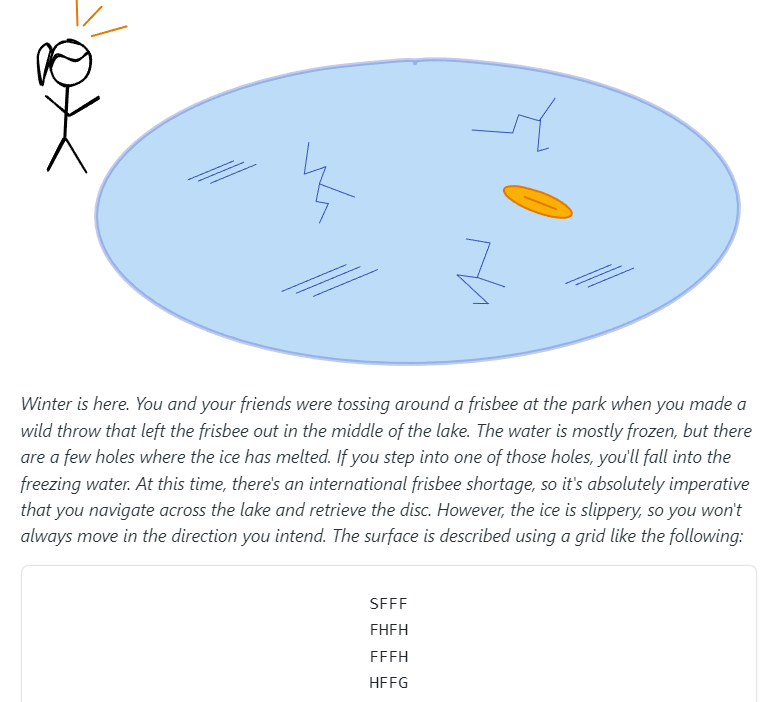

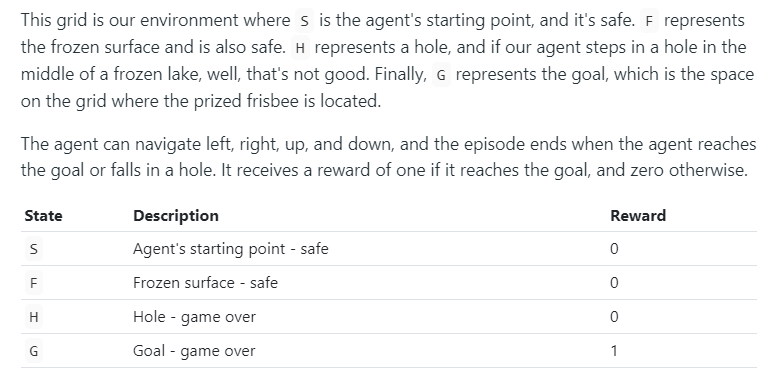

In [3]:
env = gym.make('FrozenLake-v0')

#Create_Q_table

We're now going to construct our Q-table, and initialize all the Q-values to zero for each state-action pair.

Remember, the number of rows in the table is equivalent to the size of the state space in the environment, and the number of columns is equivalent to the size of the action space. We can get this information using using env.observation_space.n and env.action_space.n, as shown below. We can then use this information to build the Q-table and fill it with zeros.

In [17]:
print(env.action_space,env.observation_space)

Discrete(4) Discrete(16)


In [18]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

In [19]:
print(action_space_size)
print(state_space_size)

4
16


In [20]:
q_table = np.zeros((state_space_size, action_space_size))

In [21]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


#Intialize QLearning Parameters:

First, with num_episodes, we define the total number of episodes we want the agent to play during training. Then, with max_steps_per_episode, we define a maximum number of steps that our agent is allowed to take within a single episode. So, if by the one-hundredth step, the agent hasn't reached the frisbee or fallen through a hole, then the episode will terminate with the agent receiving zero points.

Now, the last four parameters are all for related to the exploration-exploitation trade-off we talked about last time in regards to the epsilon-greedy policy. We're initializing our exploration_rate to 1 and setting the max_exploration_rate to 1 and a min_exploration_rate to 0.01. The max and min are just bounds to how large or small our exploration rate can be. Remember, the exploration rate was represented with the symbol  when we discussed it previously.

Lastly, we set the exploration_decay_rate to 0.01 to determine the rate at which the exploration_rate will decay.

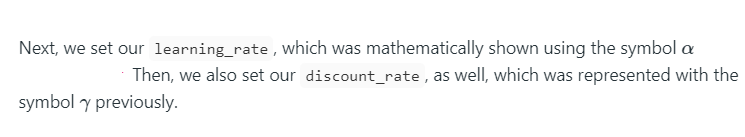

In [22]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

# Coding The Q-Learning Algorithm Training Loop

Create the list to hold all of the rewards that we'll get from each episode.

This first for-loop contains everything that happens within a single episode. This second nested loop contains everything that happens for a single time-step.

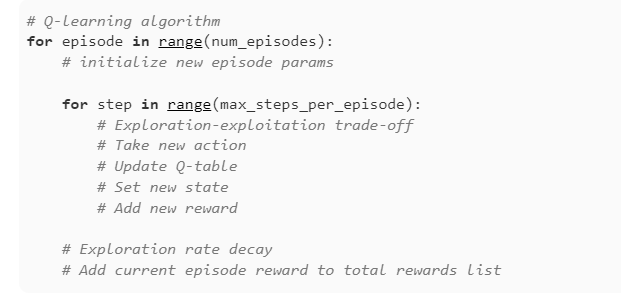

The done variable just keeps track of whether or not our episode is finished, so we initialize it to False when we first start the episode, and we'll see later where it will get updated to notify us when the episode is over.

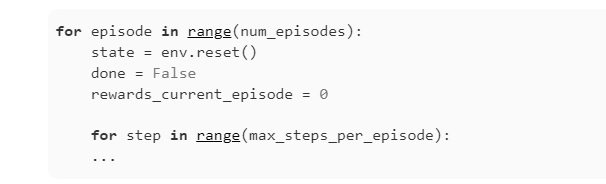


Then, we need to keep track of the rewards within the current episode as well, so we set rewards_current_episode to 0 since we start out with no rewards at the beginning of each episode.

Now we're entering into the nested loop, which runs for each time-step within an episode. The remaining steps, until we say otherwise, will occur for each time-step.

or each time-step within an episode, we set our exploration_rate_threshold to a random number between 0 and 1. This will be used to determine whether our agent will explore or exploit the environment in this time-step.

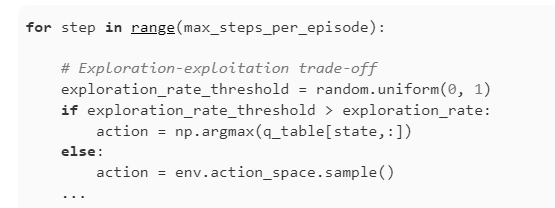

If the threshold is greater than the exploration_rate, which remember, is initially set to 1, then our agent will exploit the environment and choose the action that has the highest Q-value in the Q-table for the current state. If, on the other hand, the threshold is less than or equal to the exploration_rate, then the agent will explore the environment, and sample an action randomly.

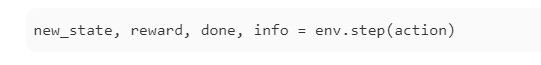

After our action is chosen, we then take that action by calling step() on our env object and passing our action to it. The function step() returns a tuple containing the new state, the reward for the action we took, whether or not the action ended our episode, and diagnostic information regarding our environment, which may be helpful for us if we end up needing to do any debugging.

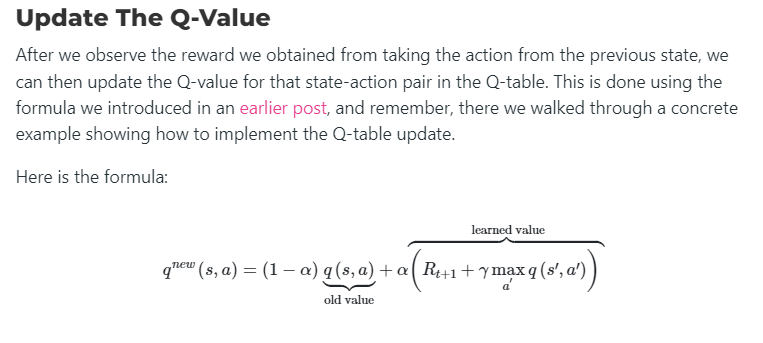

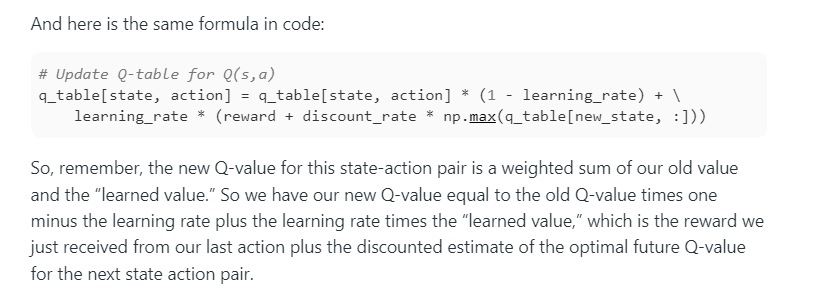

So, remember, the new Q-value for this state-action pair is a weighted sum of our old value and the “learned value.” So we have our new Q-value equal to the old Q-value times one minus the learning rate plus the learning rate times the “learned value,” which is the reward we just received from our last action plus the discounted estimate of the optimal future Q-value for the next state action pair.

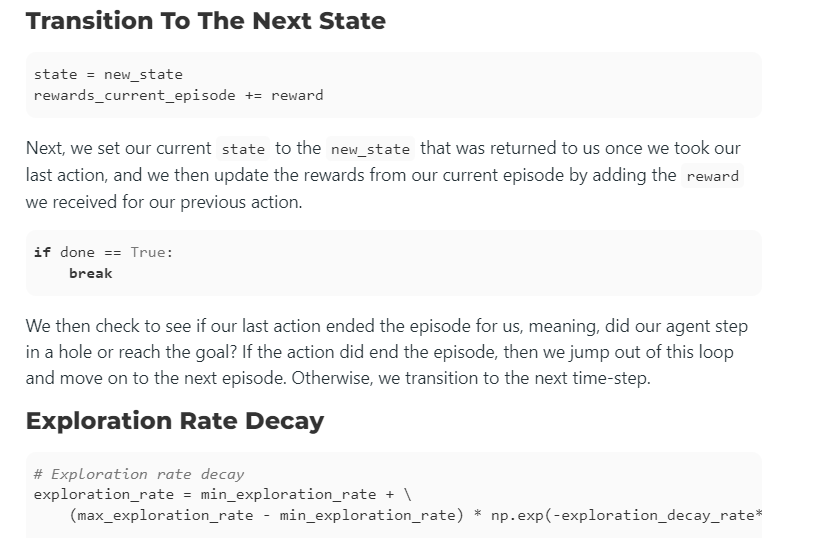

Once an episode is finished, we need to update our exploration_rate using exponential decay, which just means that the exploration rate decreases or decays at a rate proportional to its current value. We can decay the exploration_rate using the formula above, which makes use of all the exploration rate parameters 

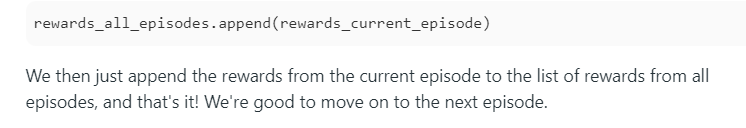

In [23]:
rewards_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
      # Exploration-exploitation trade-off
      exploration_rate_threshold = random.uniform(0, 1)
      if exploration_rate_threshold > exploration_rate:
          action = np.argmax(q_table[state,:]) 
      else:
          action = env.action_space.sample()


      new_state, reward, done, info = env.step(action)

      # Update Q-table for Q(s,a)
      q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
      learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

      state = new_state
      rewards_current_episode += reward

      if done == True: 
        break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    rewards_all_episodes.append(rewards_current_episode)

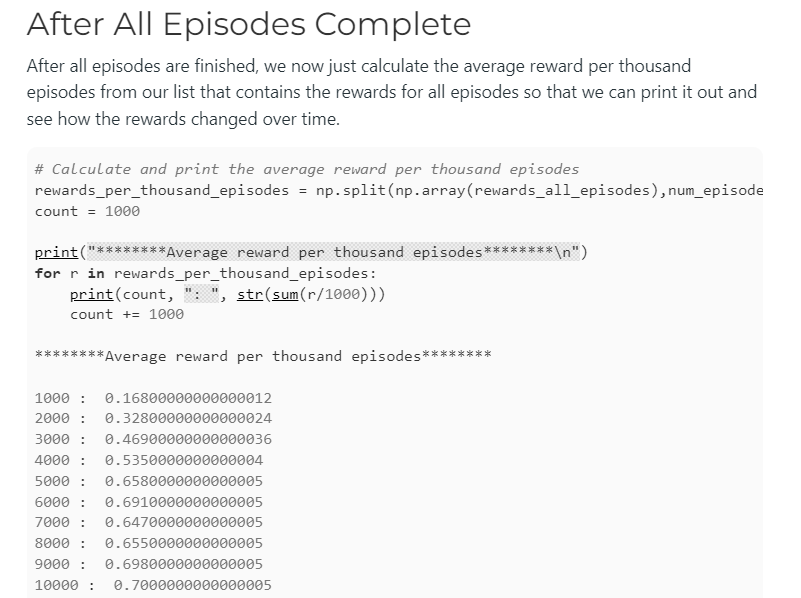

In [24]:
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.058000000000000045
2000 :  0.17000000000000012
3000 :  0.5360000000000004
4000 :  0.5340000000000004
5000 :  0.6000000000000004
6000 :  0.6640000000000005
7000 :  0.6380000000000005
8000 :  0.6540000000000005
9000 :  0.6630000000000005
10000 :  0.6430000000000005


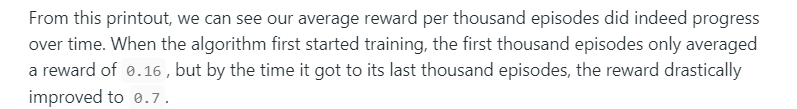

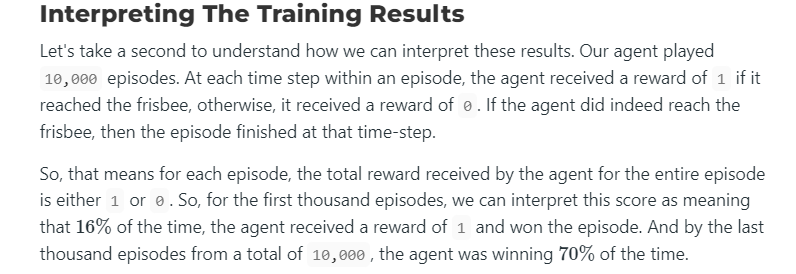

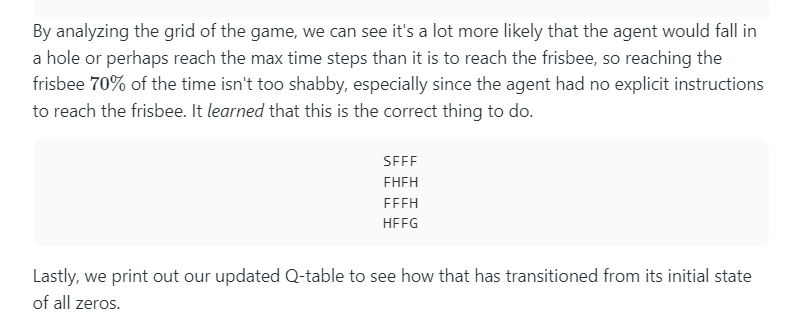

In [25]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.51898551 0.36620139 0.38728268 0.37627779]
 [0.33284009 0.0181195  0.05341485 0.09411283]
 [0.24932418 0.09316442 0.03737605 0.05079122]
 [0.01915774 0.         0.         0.        ]
 [0.52863942 0.35718369 0.43687289 0.2420361 ]
 [0.         0.         0.         0.        ]
 [0.09912899 0.04342433 0.29381006 0.05534303]
 [0.         0.         0.         0.        ]
 [0.36088098 0.43034142 0.32063241 0.55086261]
 [0.4841276  0.58770531 0.47669019 0.35202602]
 [0.58357385 0.37231629 0.24100651 0.29009734]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.49315927 0.45204222 0.7617344  0.59667658]
 [0.65445304 0.88491494 0.72819891 0.71415934]
 [0.         0.         0.         0.        ]]


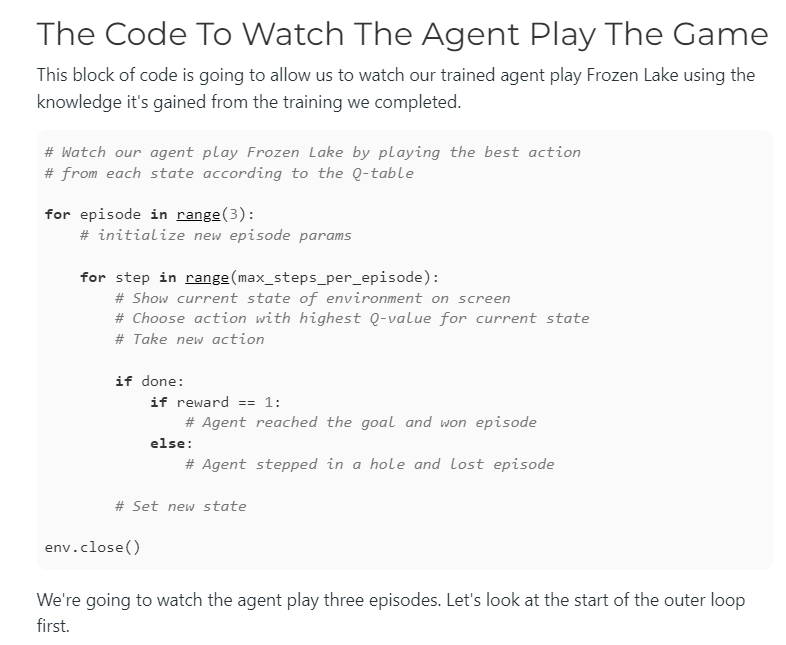

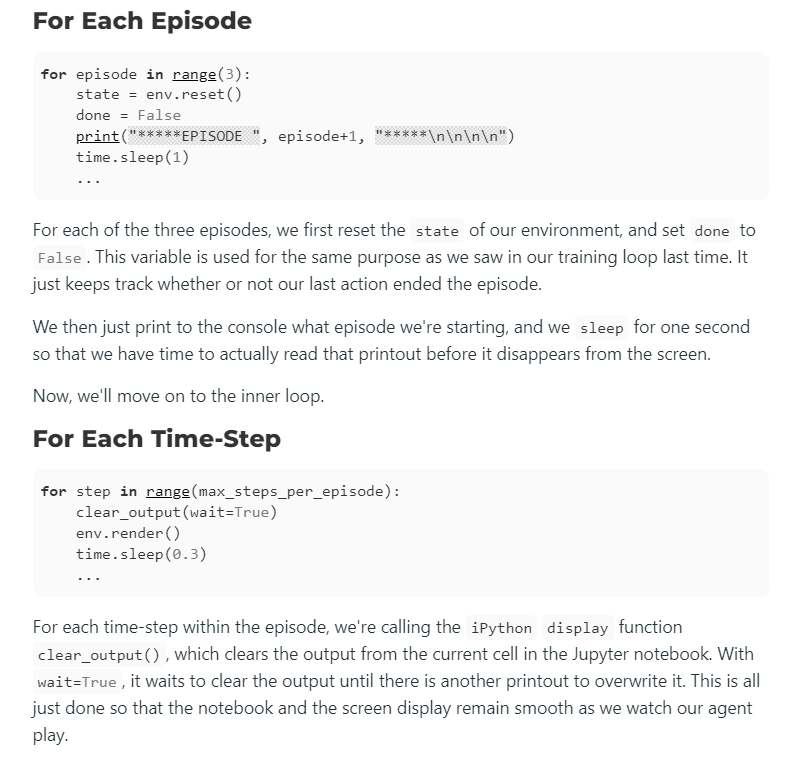

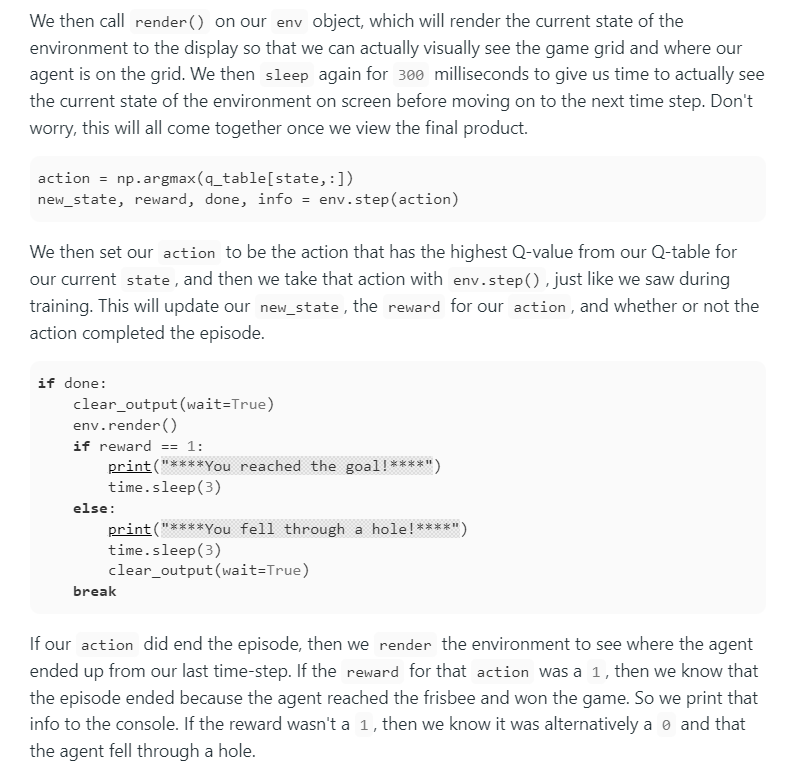

After seeing how the episode ended, we then start a new episode.

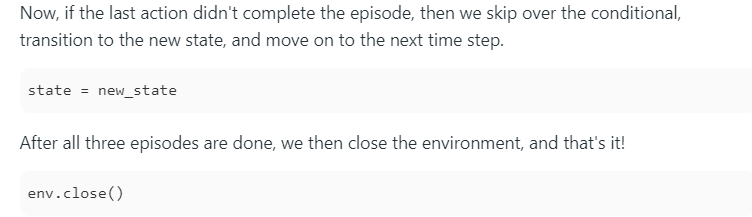

we run this code and watch the agent play! Here's what we expect. We'll have our grid printed to the screen, the agent will start in the starting state in the top left corner of the grid, and we'll be able to see the actions chosen by the agent displayed above the grid at each time step. We'll also see the agent move around the grid, as indicated with a red marker.

Remember when we introduced Frozen Lake, part of the description noted that the agent won't always take the action that it chooses to take because, since the ice is slippery, even if we choose to go right, for example, we may slip and go up instead. So keep this in mind as you watch the agent play because you may see the chosen action show as right but then see the agent take a step up, for example. The slippery ice is the reason for this.

Now check out the agent play

In [29]:
for episode in range(10):
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    for step in range(max_steps_per_episode):        
      clear_output(wait=True)
      env.render()
      time.sleep(0.3)
      #----------------------------------#
      action = np.argmax(q_table[state,:])        
      new_state, reward, done, info = env.step(action)
      #----------------------------------#
      if done:
        clear_output(wait=True)
        env.render()
        if reward == 1:
            print("****You reached the goal!****")
            time.sleep(3)
        else:
            print("****You fell through a hole!****")
            time.sleep(1)
        clear_output(wait=True)
        break

      state = new_state

env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
****You reached the goal!****
